O objetivo desse notebook é desenvolver uma metodologia para previsão de valores de plano de saúde


1° Análise Exploratória


In [2]:
# importando bibliotecas:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# carregando train dataset
train_data = pd.read_csv('Train_Data.csv')
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
train_data.shape

(3630, 7)

In [5]:
# verificando a existência de NaN ou valores faltantes
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [7]:
# descrição da base de dados (numerico)
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# descrição da base de dados (categorica)
train_data.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


Despesas:


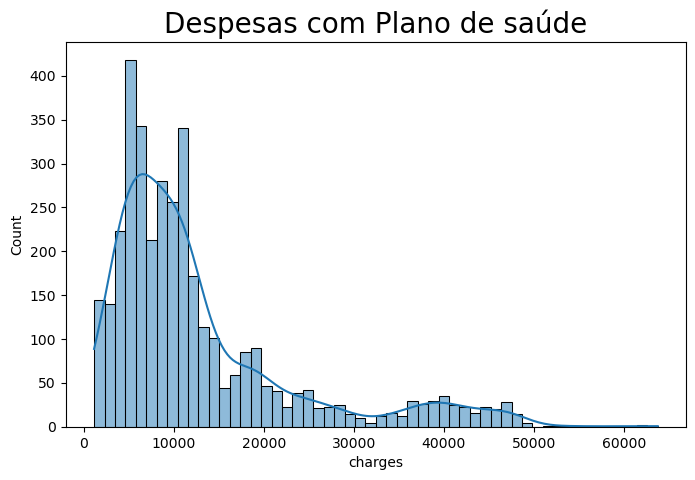

In [9]:
# histograma de despesas de seguro médico
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de saúde', fontsize=20)
plt.show()

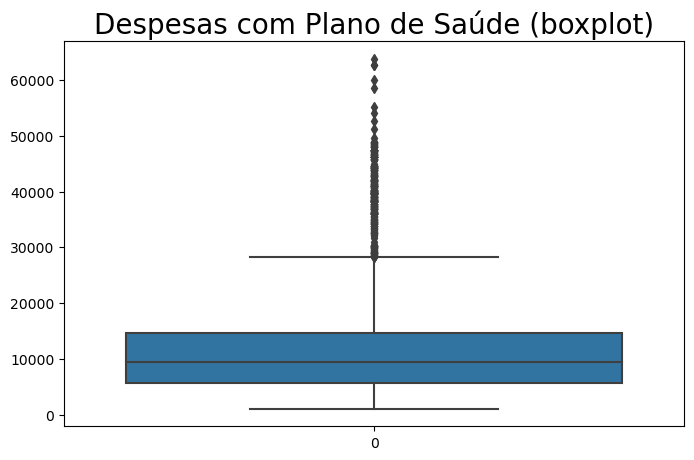

In [10]:
# boxplot de despesas de seguro médico (verificando outliers)
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (boxplot)', fontsize=20)
plt.show()

Idades:

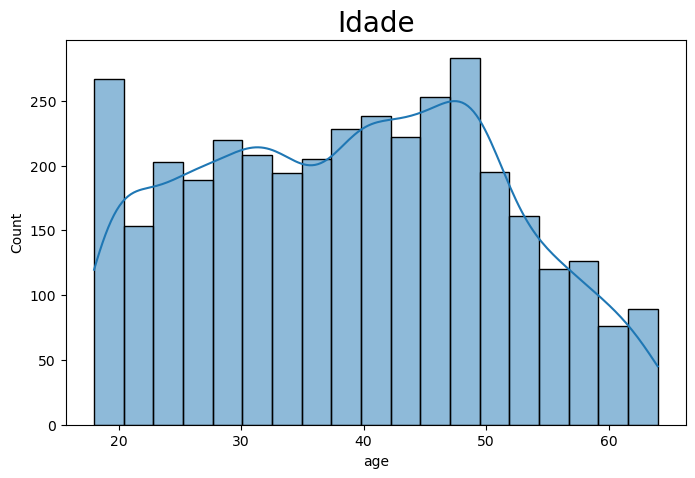

In [11]:
# histograma de idades:
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

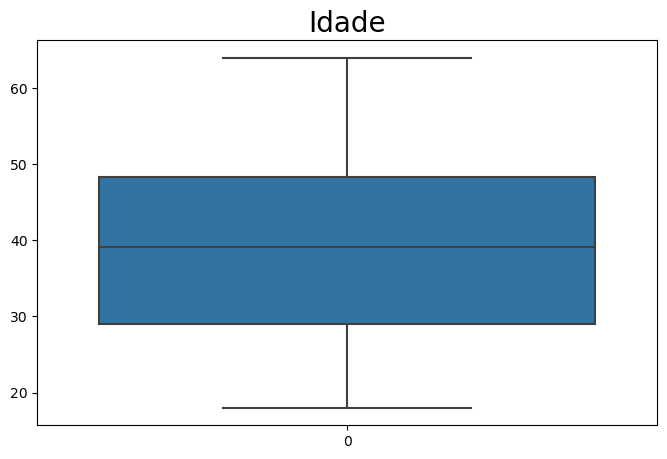

In [12]:
# boxplot de idades (verificando outliers):
plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade', fontsize=20)
plt.show()

Indice de Massa Corporal:

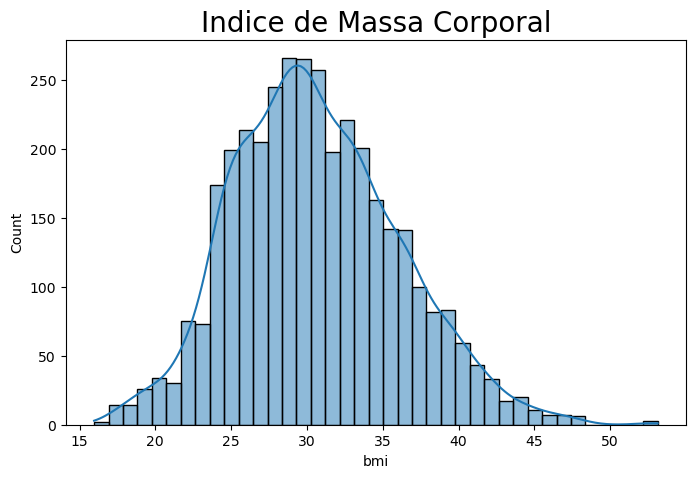

In [13]:
# histograma de índice de massa corporal:
plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Indice de Massa Corporal', fontsize=20)
plt.show()


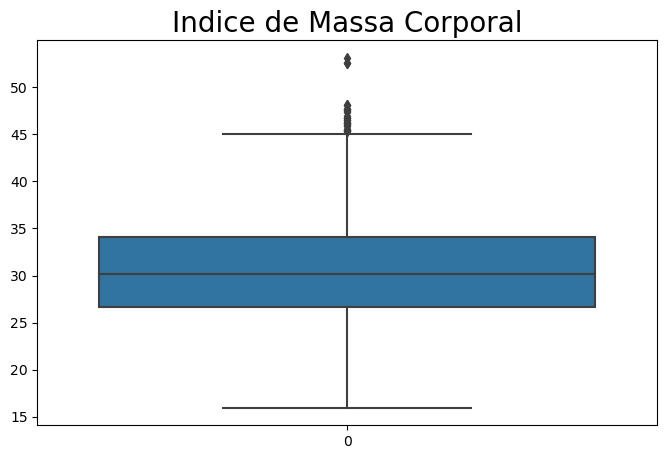

In [14]:
# boxplot de índice de massa corporal (verificando outliers):
plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('Indice de Massa Corporal', fontsize=20)
plt.show()

Filhos:


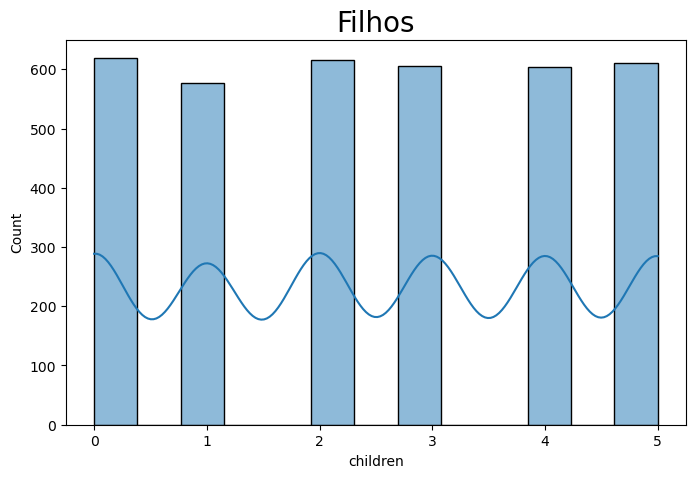

In [15]:
# histograma de filhos:
plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('Filhos', fontsize=20)
plt.show()

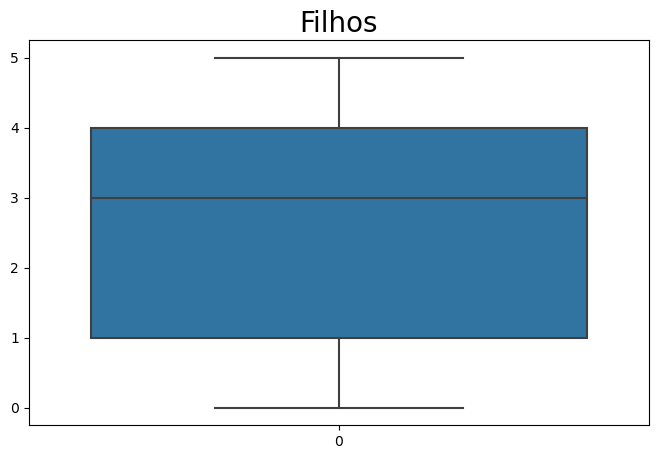

In [16]:
# boxplot de filhos (verificando outliers):
plt.figure(figsize=(8,5))
sns.boxplot(train_data['children'])
plt.title('Filhos', fontsize=20)
plt.show()

Gêneros:

Homem: 2029
Mulher: 1601


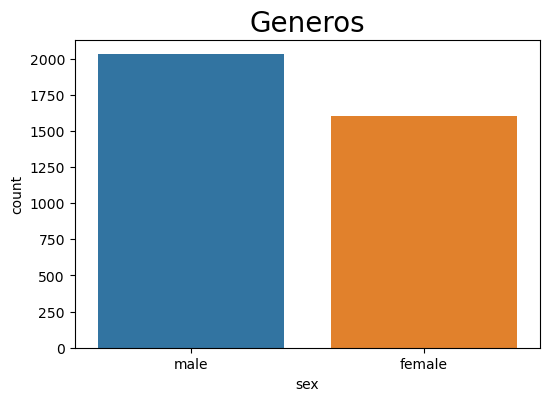

In [17]:
print("Homem:", train_data['sex'].value_counts()[0])
print("Mulher:", train_data['sex'].value_counts()[1])

# visualizando
plt.figure(figsize=(6,4))
sns.countplot(x = 'sex', data= train_data)
plt.title('Generos', fontsize=20)
plt.show()



Fumantes e não Fumantes:

Fumantes: 560
Não-Fumantes: 3070


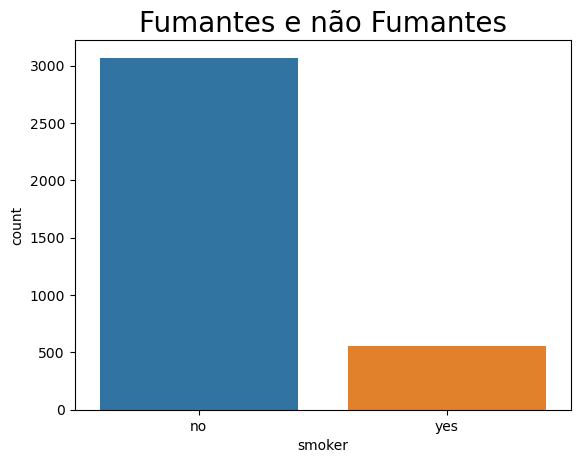

In [18]:
print("Fumantes:", train_data['smoker'].value_counts()[1])
print("Não-Fumantes:", train_data['smoker'].value_counts()[0])

# visualização:
sns.countplot(x='smoker', data=train_data)
sns.countplot(x='smoker', data=train_data)
plt.title("Fumantes e não Fumantes", fontsize=20)
plt.show()

Região:


Região Sudeste: 1021
Região Centro-Oeste: 911
Região Sul: 850
Região Nordeste: 848


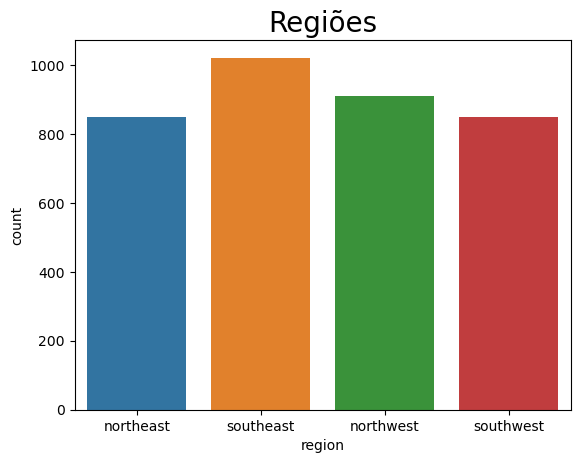

In [19]:
print("Região Sudeste:", train_data['region'].value_counts()[0])
print("Região Centro-Oeste:", train_data['region'].value_counts()[1])
print("Região Sul:", train_data['region'].value_counts()[2])
print("Região Nordeste:", train_data['region'].value_counts()[3])

# visualização

sns.countplot(x='region', data=train_data)
sns.countplot(x='region', data=train_data)
plt.title("Regiões", fontsize=20)
plt.show()



2° Pré-Processamento dos Dados

In [20]:
# Arredondar a variável AGE:
train_data['age'] = round(train_data['age'])

In [21]:
# Visualizando
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [22]:
# Encondig: Transformando as variáveis em numéricas:
train_data = pd.get_dummies(train_data, drop_first=True)

In [23]:
# visualizando
train_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [24]:
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
# reorganizando as colunas:
train_data = train_data[['age', 'sex_male', 'smoker_yes', 'bmi', 'children', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]
train_data.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239


In [26]:
# splitting
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]


In [27]:
X.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0


In [28]:
y.head(2)

0     3279.868550
1    21454.494239
Name: charges, dtype: float64

In [29]:
# Train Test split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


3° Construção e Avaliação da Máquina Preditiva:


Criação da metodologia de previsão do valor do custo do plano de saúde

In [30]:
# importando métricas de avaliação:
from sklearn.metrics import mean_squared_error, r2_score

MP com Regressão Linear 


In [31]:
# Regressão Linear:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# predição:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7482602892322038
30898859.035960782


MP com Regressão Ridge:

In [32]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# predição:
y_pred = Ridge.predict(X_test)

# Score:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7481028884319252
30918178.61460462


MP com Regressão Lasso:


In [33]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Predição:
y_pred = Lasso.predict(X_test)

# Score:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.7482269824960902
30902947.14800708


MP com Random Forest:

In [34]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# predição:
y_pred = RandomForestRegressor.predict(X_test)

# Score:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9056044528897003
11586232.044549828


Salvamento da Máquina Preditiva

In [35]:
import pickle
filename = "CustodePlanodeSaude.pkl"
pickle.dump(RandomForestRegressor, open(filename, 'wb'))